In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('../data/transformed/music_metadata.parquet')
df = df[['tag']]

In [3]:
df['tag'] = df['tag'].apply(lambda row: row.title())
df['tag']

0          Rap
1          Rap
2          Rap
3          Rap
4          Rap
          ... 
5134047    Rap
5134167    Pop
5134355    Pop
5134437    Pop
5134663    Pop
Name: tag, Length: 1356283, dtype: object

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort genres by count
order = df['tag'].value_counts().index

# Plot with sorted order
sns.countplot(data=df, x='tag', order=order)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # optional, if labels are long
plt.tight_layout()
plt.show()


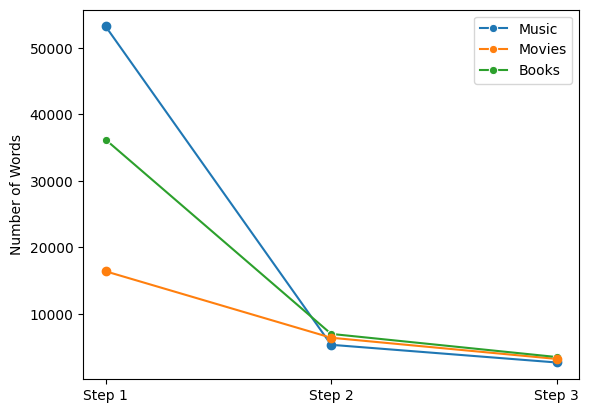

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define three points (x, y1, y2)
x = ["Step 1", "Step 2", "Step 3"]
y1 = [53246, 5320, 2658]
y2 = [16380, 6385, 3192]
y3 = [36198, 6959, 3479]
# Create a DataFrame to work with Seaborn
df = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2,'y3': y3})

# Plot using Seaborn's lineplot for both y1 and y2
sns.lineplot(data=df, x='x', y='y1', marker='o', label='Music')
sns.lineplot(data=df, x='x', y='y2', marker='o', label='Movies')
sns.lineplot(data=df, x='x', y='y3', marker='o', label='Books')

# Plot the original points for both y1 and y2
plt.scatter(x, y1, zorder=5)
plt.scatter(x, y2, zorder=5)

# Add labels
plt.xlabel('')
plt.ylabel('Number of Words')
plt.title('')

# Add a legend
plt.legend()

# Show the plot
plt.show()


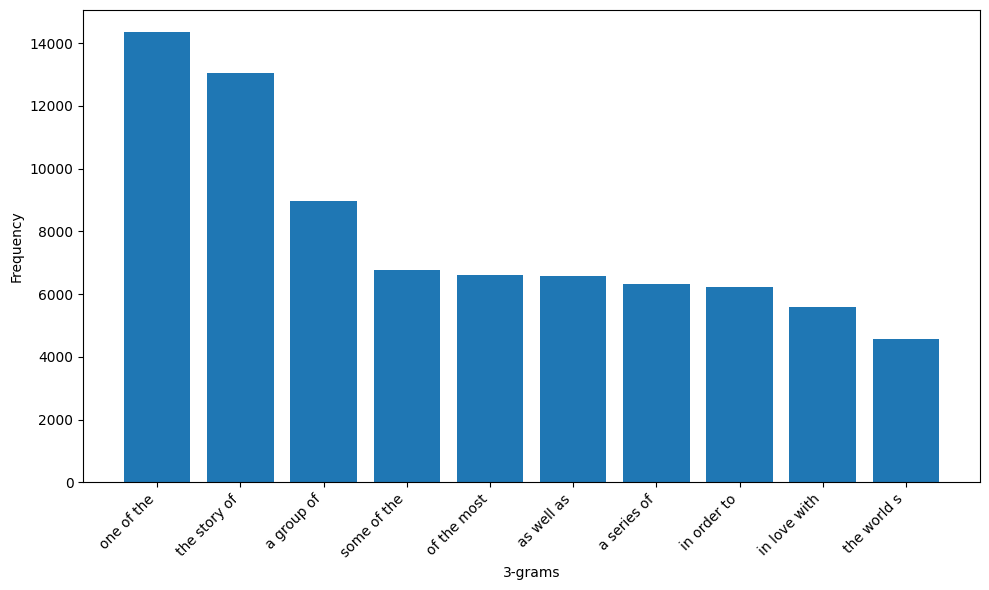

In [12]:
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_parquet('../data/transformed/movies_overview.parquet')

def plot_ngrams_across_rows(df, text_column, n=2, top_n=10):
    tokenizer = RegexpTokenizer(r'\w+')
    ngram_counter = Counter()
    
    for text in df[text_column].dropna().astype(str):
        tokens = tokenizer.tokenize(text.lower())
        ngram_counter.update(ngrams(tokens, n))
    
    top_ngrams = ngram_counter.most_common(top_n)
    ngrams_labels, counts = zip(*top_ngrams)
    ngrams_labels = [' '.join(ng) for ng in ngrams_labels]

    plt.figure(figsize=(10, 6))
    plt.bar(ngrams_labels, counts)
    plt.xlabel(f"{n}-grams")
    plt.ylabel("Frequency")
    plt.title(f"")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Example: plot trigrams
plot_ngrams_across_rows(df=df, text_column='overview', n=3, top_n=10)


In [20]:
df = pd.read_csv('../data/raw/book_dataset.csv')
df = df[df['language'] == 'English']
df = df[['description', 'genres']]
df['description'] = df['description'].str.replace(r'[\n\t]', ' ', regex=True)  # replace \n and \t with space
df['description'] = df['description'].str.replace(r'\s+', ' ', regex=True)  # collapse multiple spaces
df['description'] = df['description'].str.strip()  # remove leading/trailing spaces
df

,description,genres
0,Ryland Grace is the sole survivor on a despera...,"['Science Fiction Fantasy', 'Audiobook', 'Fant..."
1,"Since his debut in 1955, Tom Ripley has evolve...","['Novels', 'Noir', 'Classics', 'Italy', 'Suspe..."
2,"A boy drowns, desperate and alone in his final...","['Queer', 'Fantasy', 'Contemporary', 'LGBT', '..."
3,Orphaned by her mother and brushed off by her ...,"['Chick Lit', 'Fantasy', 'Coming Of Age', 'Con..."
4,"After an impoverished and indigent childhood, ...","['Contemporary', 'Contemporary Romance', 'Roma..."
...,...,...
14706,“In places that know more about heaven and hel...,"['Magic', 'Vampires', 'Young Adult', 'Urban Fa..."
14707,"The Woman in the Dunes, by celebrated writer a...","['Classics', 'Fiction', 'Japan', 'Novels', 'Ja..."
14708,"""I felt cold metal on the side of my skull bef...","['Adventure', 'Young Adult', 'Historical', 'Te..."
14709,Peacocks for dinner and boys in skirts? That's...,"['Adventure', 'Middle Grade', 'Magic', 'Childr..."


In [26]:
import ast

df['genres'] = df['genres'].apply(ast.literal_eval)
df[['genre_1', 'genre_2', 'genre_3', 'rerst']] = pd.DataFrame(df['list_column'].tolist(), index=df.index)


KeyError: 'genres'

In [48]:
df = pd.read_csv('../data/raw/book_dataset.csv')
df = df[['description', 'genres']]
df['genres'] = df['genres'].apply(ast.literal_eval)

def pad_genres(genres_list, length=4):
    return genres_list + [None] * (length - len(genres_list))

df['genres'] = df['genres'].apply(lambda x: pad_genres(x, 4))
df['genre_1'] = df['genres'].apply(lambda row:  row[0])
df['genre_2'] = df['genres'].apply(lambda row:  row[1])
df['genre_3'] = df['genres'].apply(lambda row:  row[2])
df = df.drop(columns=['genres'])


In [51]:
df['id'] = df.index + 1  # Adding 1 to start from 1 instead of 0

In [53]:
df['description'] = df['description'].str.replace(r'[\n\t]', ' ', regex=True)  # replace \n and \t with space
df['description'] = df['description'].str.replace(r'\s+', ' ', regex=True)  # collapse multiple spaces
df['description'] = df['description'].str.strip()  # remove leading/trailing spaces

In [58]:
df = pd.read_csv('../data/raw/BooksDataSet.csv')

In [60]:
df['summary'] = df['summary'].str.replace(r'[\n\t]', ' ', regex=True)  # replace \n and \t with space
df['summary'] = df['summary'].str.replace(r'\s+', ' ', regex=True)  # collapse multiple spaces
df['summary'] = df['summary'].str.strip() 

In [66]:
df.columns = ['id', 'name', 'genre', 'summary']
df[['id', 'genre']].to_parquet('book_metadata_2.parquet')
df[['id', 'summary']].to_parquet('book_descriptions_2.parquet')
df

,id,name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among t...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school b..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fian...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel returni...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben ...
...,...,...,...,...
2995,10372180,White Death,Thriller,"A Novel from the NUMA files, A Kurt Austin Adv..."
2996,14504372,Venus with Pistol,Thriller,Gilbert Kemp is dealer specializing in antique...
2997,3617412,Blackwater,Thriller,"""How do you know when you're in too deep? Dave..."
2998,11320975,The Rainbow and the Rose,Thriller,"The story concerns the life of Johnnie Pascoe,..."


In [67]:
len(df)

3000

In [57]:
df[['id', 'description']].to_parquet('../data/transformed/book_descriptions_2.parquet')

In [56]:
df[['id', 'genre_1', 'genre_2', "genre_3"]].to_parquet('../data/transformed/books_metadata_2.parquet')

In [54]:
df

,description,genre_1,genre_2,genre_3,id
0,Ryland Grace is the sole survivor on a despera...,Science Fiction Fantasy,Audiobook,Fantasy,1
1,"Since his debut in 1955, Tom Ripley has evolve...",Novels,Noir,Classics,2
2,"A boy drowns, desperate and alone in his final...",Queer,Fantasy,Contemporary,3
3,Orphaned by her mother and brushed off by her ...,Chick Lit,Fantasy,Coming Of Age,4
4,"After an impoverished and indigent childhood, ...",Contemporary,Contemporary Romance,Romance,5
...,...,...,...,...,...
14707,"The Woman in the Dunes, by celebrated writer a...",Classics,Fiction,Japan,14708
14708,"""I felt cold metal on the side of my skull bef...",Adventure,Young Adult,Historical,14709
14709,Peacocks for dinner and boys in skirts? That's...,Adventure,Middle Grade,Magic,14710
14710,When Sam's best friend gets her first boyfrien...,Young Adult Contemporary,Middle Grade,Young Adult,14711


In [50]:
df.to_parquet('../data/transformed/books_descriptions.parquet')

ValueError: `bins` must be positive, when an integer

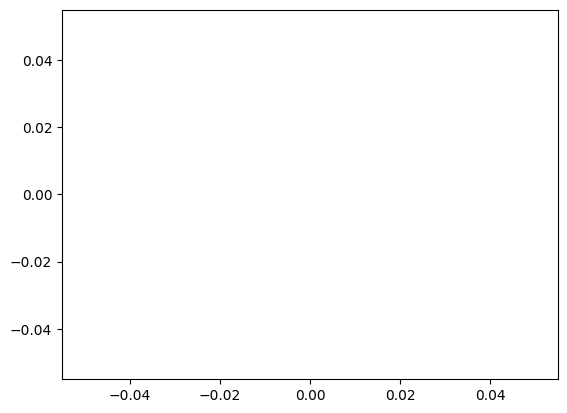

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df['length'], binwidth=5)
plt.xlim(0, 5000)
plt.xlabel('Length of Text')